# Reading Files and Split Apply Combine

This lesson focuses on reviewing our basics with pandas and extending them to more advanced munging and cleaning.  Specifically, we will discuss how to load data files, work with missing values, use split-apply-combine, use string methods, and work with string and datetime objects.  By the end of this lesson you should feel confident doing basic exploratory data analysis using `pandas`. 

**OBJECTIVES**

- Read local files in as `DataFrame` objects
- Drop missing values
- Replace missing values
- Impute missing values
- Use `.groupby` 
- Use built in `.dt` methods
- Convert columns to `pd.datetime` datatype
- Work with `datetime` objects in pandas.


## Reading Local Files

To read in a local file, we need to pay close attention to our *working directory*.  This means the current location of your work enviornment with respect to your larger computer filesystem.  To find your working directory you can use the `os` library or if your system executes UNIX commands these can be used.

- All files for today live [here](https://github.com/jfkoehler/bootcamp_spr25/tree/main/data)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pip install seaborn

In [3]:
#check working directory
os.getcwd()

'/Users/jacobkoehler/Desktop/spring_25/bootcamp_spr25'

In [4]:
#list all files in directory
os.listdir()

['classifier_evaluation_b.ipynb',
 'practice_regression.ipynb',
 'polynomial_models.ipynb',
 'intro_to_plotting.ipynb',
 'iteration.ipynb',
 'eda_consulting.ipynb',
 'imgs',
 'html_data.ipynb',
 'images',
 'data-types.ipynb',
 'homework_IV.ipynb',
 'oop.ipynb',
 'intro_ipywidgets.ipynb',
 'intro_decision_tree.ipynb',
 'dates_intro_to_plotting.ipynb',
 'functions.ipynb',
 '_toc.yml',
 'folium_exs-clean.ipynb',
 'logo.png',
 'exercises',
 'data_apis.ipynb',
 'functions_intro_pandas.ipynb',
 '_build',
 '_config.yml',
 'logistic_starter_code.ipynb',
 'homeworks',
 'regression_intro.ipynb',
 '.ipynb_checkpoints',
 'knn_crossval.ipynb',
 'syllabus.ipynb',
 '.git',
 'plotting_seaborn.ipynb',
 'Bonus_Plotting_with_bokeh.ipynb',
 'data',
 'pandas_II.ipynb']

In [5]:
#create a data directory/folder


In [6]:
#what's in the data folder?


In [7]:
#what is the path to ufo.csv?


##### `read_csv`

Now, using the path to the `ufo.csv` file, you can create a DataFrame by passing this filepath to the `read_csv` function.

In [8]:
#read in ufo data


In [9]:
# look at first 2 rows


In [10]:
# high level information


In [11]:
# numerical summaries


In [12]:
# categorical summaries


In [13]:
# all summaries


### Reading from url

You can also load datasets from urls where a `.csv` (or other) file live.  Github is one example of this.  Note that you want to be sure to use the *raw* version of the file.  For example, a github user `dsnair` has shared datasets from the book [Introduction to Statistical Learning]() at the link below:


https://github.com/dsnair/ISLR/tree/master/data/csv

read in the Auto dataset below.

In [14]:
# get url to raw data
auto_url = 'https://raw.githubusercontent.com/dsnair/ISLR/master/data/csv/Auto.csv'

In [15]:
# pass to read_csv


In [16]:
# look at the first few rows


In [17]:
# high level information


#### Problems

1. Read in the `diamonds.csv` file from the `data` folder, and create a DataFrame named `diamonds`.

2. How many diamonds are greater than .5 carat in the data?

3. What is the highest priced diamond in the data?

4. Read the data from the `caravan.csv` file in located [here](https://github.com/dsnair/ISLR/blob/master/data/csv/Caravan.csv).  Assign this to a variable `caravan`.

5. How many `Yes`'s are in the `Purchase` column of the `caravan` data?  No's?

### Missing Values

Missing values are a common problem in data, whether this is because they are truly missing or there is confusion between the data encoding and the methods you read the data in using.

In [18]:
# re-examine ufo info


In [19]:
# one-liner to count missing values


In [20]:
# drop missing values


In [21]:
# fill missing values


In [22]:
# replace missing values with most common value


#### Problem

1. Read in the dataset `churn_missing.csv` in the data folder, assign to a variable `churn` below.

2. Are there any missing values?  What columns are they in and how many are there?

3. What do you think we should do about these?  Drop, replace, impute?

### `groupby`

Often, you are faced with a dataset that you are interested in summaries within groups based on a condition.  The simplest condition is that of a unique value in a single column.  Using `.groupby` you can split your data into unique groups and summarize the results.  

**NOTE**: After splitting you need to summarize!

![](https://www.oreilly.com/api/v2/epubs/9781783985128/files/graphics/5128OS_09_01.jpg)

In [23]:
# sample data
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

A      B         C         D
0  foo    one -0.364849 -0.114791
1  bar    one  1.461725 -0.376533
2  foo    two -0.317835 -0.286330
3  bar  three -0.524314 -0.536285
4  foo    two  0.408718 -0.245425
5  bar    two -1.262950 -0.267023
6  foo    one -1.188408  0.994888
7  foo  three -0.263019 -0.283699

In [24]:
# foo vs. bar


In [25]:
# one two or three?


In [26]:
# A and B


In [27]:
# working with multi-index


In [28]:
# age less than 40 survival rate
titanic = sns.load_dataset('titanic')


#### Problems

In [29]:
tips = sns.load_dataset('tips')

In [30]:
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

1. Average tip for smokers vs. non-smokers.

2. Average bill by day and time.

3. What is another question `groupby` can help us answer here?

4. What does the `as_index` argument do?  Demonstrate an example.

### Plotting from a `DataFrame`

Next class we will introduce two plotting libraries -- `matplotlib` and `seaborn`.  It turns out that a `DataFrame` also inherits a good bit of `matplotlib` functionality, and plots can be created directly from a `DataFrame`.

In [31]:
url = 'https://raw.githubusercontent.com/evorition/astsadata/refs/heads/main/astsadata/data/UnempRate.csv'

In [32]:
unemp = pd.read_csv(url)

<Axes: >

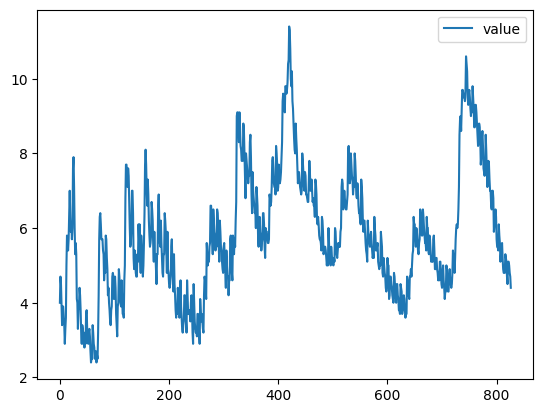

In [33]:
#default plot is line
unemp.plot()

In [34]:
unemp.head()

index  value
0  1948 Jan    4.0
1  1948 Feb    4.7
2  1948 Mar    4.5
3  1948 Apr    4.0
4  1948 May    3.4

In [35]:
unemp = pd.read_csv(url, index_col = 0)
unemp.head()

value
index          
1948 Jan    4.0
1948 Feb    4.7
1948 Mar    4.5
1948 Apr    4.0
1948 May    3.4

In [36]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 1948 Jan to 2016 Nov
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   827 non-null    float64
dtypes: float64(1)
memory usage: 12.9+ KB


<Axes: xlabel='index'>

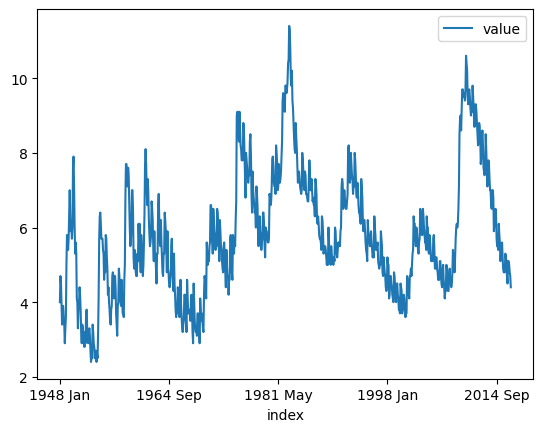

In [37]:
unemp.plot()

array([[<Axes: title={'center': 'value'}>]], dtype=object)

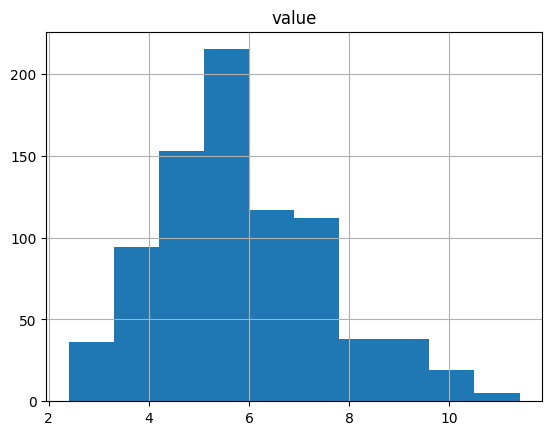

In [38]:
unemp.hist()

<Axes: >

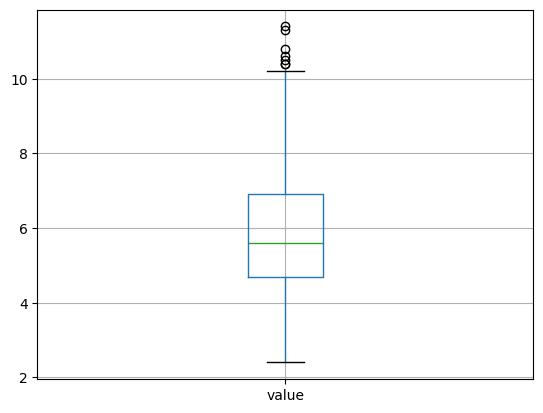

In [39]:
unemp.boxplot()

In [40]:
#create a new column of shifted measurements
unemp['shifted'] = unemp.shift()

<Axes: xlabel='index'>

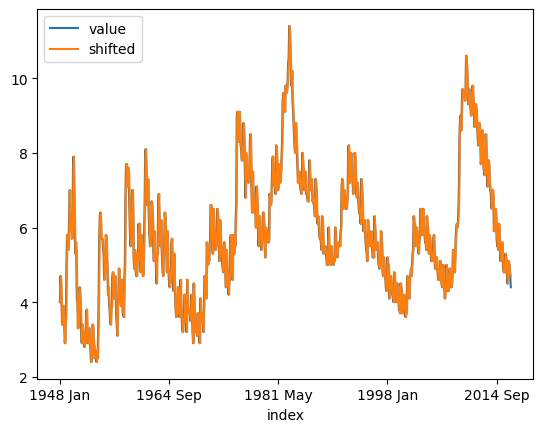

In [41]:
unemp.plot()

<Axes: xlabel='value', ylabel='shifted'>

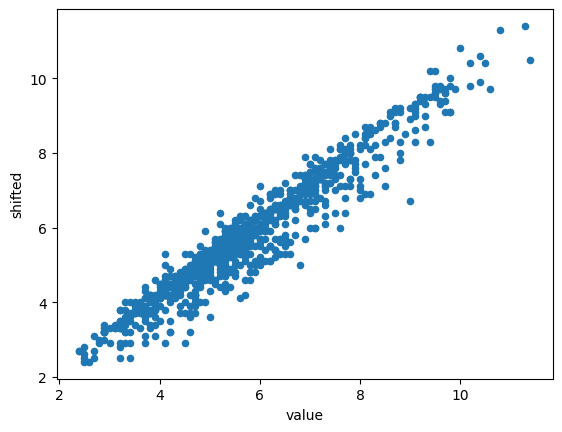

In [42]:
unemp.plot(x = 'value', y = 'shifted', kind = 'scatter')

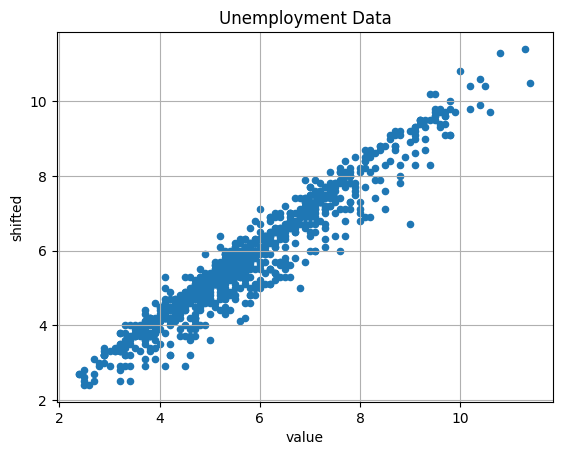

In [43]:
unemp.plot(x = 'value', y = 'shifted', kind = 'scatter', title = 'Unemployment Data', grid = True);

More with `pandas` and plotting [here](https://pandas.pydata.org/docs/user_guide/visualization.html).

### Solving Business Problems with Data

A small skateboard shop is looking to increase their sales.  They have been in operation for 3 years, and have historical sales data for this time.  You have been tasked as a consultant to the shop to support these efforts.

1. Reframe in your mind what the issue might be and what is most relevant/important -- ask business questions only.
2. What are possible actions you might take in your role and what decisions/choices do they translate to?
3. What would you need to know to make better decisions?
4. How would you measure "better" decisions?
5. How might data help you make the decisions better?
6. Can you evaluate your strategy BEFORE implementation?
7. What alternative strategies could you compare this to?

Please discuss and complete your answers in the form [here](https://docs.google.com/forms/d/e/1FAIpQLSeii71J1rWu7N2lkHZqKA_g2D4eLwBzMVSmjW_izlfjDYj2IQ/viewform?usp=sharing).  Only one form for each group, make sure to identify all members by full name.
